In [23]:
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def decompose_barcode_file( file_path:str ) -> list:
    valid_reads = {}
    total= 0
    with open( file_path )  as f:
        datas = f.readlines()
        for i in datas:
            tmp_id, tmp_bar , tmp_l = i.strip().split()
            if 'NO' not in tmp_bar and 'False' not in tmp_l:
                valid_reads[tmp_id] = tuple( tmp_bar.split(',') )
            total += 1
    print( 'total_reads:%d , valid_reads:%d , valid_ratio:%f'%( total, len(valid_reads) , len(valid_reads)/total ) )
    return valid_reads

def barcode_to_location_dic( s:str='ABCDEFGH' , n:int=12):
    map_dic = {}
    for i in s:
        for j in range(1,n+1):
            map_dic[ i+str(j) ] = len( map_dic )
    return map_dic





In [3]:
valid_reads = decompose_barcode_file('/home/gujianhui/mingxia_data/02.analysis/0622EC/0622EC_debar_bar')

total_reads:17445840 , valid_reads:12987290 , valid_ratio:0.744435


In [30]:
map_dic = barcode_to_location_dic()
# spat_cnt = collections.Counter( [ i[:2] for i in valid_reads.values() if i[2] == 'C1'] )
spat_cnt = collections.Counter( [ i[:2] for i in valid_reads.values() ] )

In [31]:
plot_dic = collections.defaultdict( collections.Counter )
for i,val in spat_cnt.items():
    plot_dic[ map_dic[i[0]] ][ map_dic[i[1]] ] = val

In [43]:
plot_df = pd.DataFrame.from_dict( plot_dic)
plot_df = plot_df[list(range(0,96))].reindex(list(range(47,-1,-1)))  

KeyError: 48

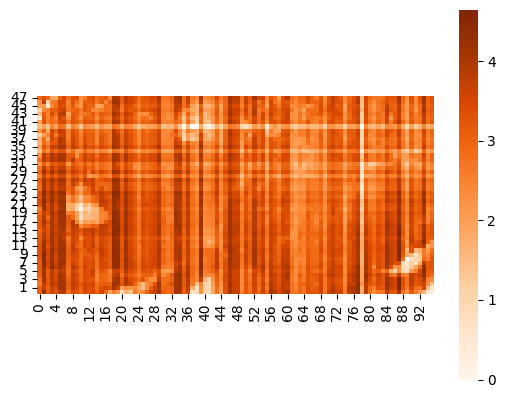

In [48]:
seaborn.heatmap( np.log10(plot_df) , cmap='Oranges'  )
plt.gca().set_aspect(1)